# TEST pycoQC package
** This notebook contains tests for all functions contained in pycoQC package **

In [7]:
# Jupyter specific imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Pyplot/matplotlib imports and setting
import pylab as pl
%pylab inline
pl.rcParams['figure.figsize'] = 20, 7
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('seaborn-white')

# Import pycoQC main class
from pycoQC import pycoQC

Populating the interactive namespace from numpy and matplotlib


## pycoQC __init__

In [8]:
help(pycoQC.__init__)

Help on function __init__ in module pycoQC:

__init__(self, seq_summary_file, runid=None, verbose=False)
    Parse Albacore sequencing_summary.txt file and clean-up the data
    * seq_summary_file
        Path to the sequencing_summary.txt generated by Albacore
    * runid
        If you want a specific runid to be analysed. By default it will analyse all the read in the file irrespective of their runid 
        [Default None]
    * verbose
        print additional informations. [Default False]



In [9]:
p = pycoQC("./data/sequencing_summary.txt")

In [10]:
p = pycoQC("./data/sequencing_summary.txt", runid="7082b6727942b3939a023beaf03ef24cec1722e5" ,verbose=True)

,Counts
ad3de3b63de71c4c6d5ea4470a82782cf51210d9,126583
7082b6727942b3939a023beaf03ef24cec1722e5,1013


,filename,run_id,channel,start_time,duration,num_events,template_start,num_events_template,template_duration,num_called_template,sequence_length_template,mean_qscore_template,strand_score_template
read_id,,,,,,,,,,,,,
6b435c57-ec5e-47b8-9d4f-e026507a4504,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173...,7082b6727942b3939a023beaf03ef24cec1722e5,102,136.09975,7.27925,5655,0.14825,5655,7.13100,5655,3474,12.305,-0.0009
134a4929-394a-4619-8a70-cf89b643dd43,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173...,7082b6727942b3939a023beaf03ef24cec1722e5,102,68.09900,30.68575,24381,0.02175,24381,30.66400,24381,15373,12.179,-0.0010
e6a100f7-0f04-4d23-a72c-b56b9871f383,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173...,7082b6727942b3939a023beaf03ef24cec1722e5,102,192.25200,4.97875,3966,0.04300,3966,4.93575,3966,2367,12.203,-0.0009
16c8ede8-565a-4cd0-8406-e463a06ddbcd,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173...,7082b6727942b3939a023beaf03ef24cec1722e5,125,87.37900,8.19900,6455,0.07575,6455,8.12325,6455,3471,12.129,-0.0008
3938e8cf-8076-48ad-a2b5-5f0ce6d5863c,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173...,7082b6727942b3939a023beaf03ef24cec1722e5,125,120.08900,10.96200,5453,4.15200,5453,6.81000,5453,2958,8.739,-0.0009


In [11]:
p = pycoQC("./data/sequencing_summary.txt", verbose=True)

,Counts
ad3de3b63de71c4c6d5ea4470a82782cf51210d9,126583
7082b6727942b3939a023beaf03ef24cec1722e5,1013


,filename,run_id,channel,start_time,duration,num_events,template_start,num_events_template,template_duration,num_called_template,sequence_length_template,mean_qscore_template,strand_score_template
read_id,,,,,,,,,,,,,
43bb3455-6579-4c53-a9ae-56e23777e128,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173...,ad3de3b63de71c4c6d5ea4470a82782cf51210d9,110,3315.66450,4.20625,3316,0.04125,3316,4.16500,3316,2140,14.141,-0.0006
472aba57-197e-4d33-9ea5-b37345b17faa,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173...,ad3de3b63de71c4c6d5ea4470a82782cf51210d9,103,3721.13375,3.94175,3086,0.11350,3086,3.82825,3086,1980,10.880,-0.0013
666705e8-dcdb-4731-b291-d3109c480c32,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173...,ad3de3b63de71c4c6d5ea4470a82782cf51210d9,102,4573.79600,7.03775,5588,0.03725,5588,7.00050,5588,3524,13.397,-0.0007
743e1e8f-214d-4669-afab-0cd3bb4d4876,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173...,ad3de3b63de71c4c6d5ea4470a82782cf51210d9,109,3767.45425,1.03725,806,0.04900,806,0.98825,806,515,11.437,-0.0019
8361b3fd-c772-4fd7-b9ae-49558341189c,Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173...,ad3de3b63de71c4c6d5ea4470a82782cf51210d9,103,4517.39050,1.54200,946,0.33450,946,1.20750,946,556,11.031,-0.0016


## overview

In [12]:
help(pycoQC.overview)

Help on function overview in module pycoQC:

overview(self)
    Generate a quick overview of the data (tables + plots)



,Count
Reads,127596
Bases,1188408969
Events,2182224107
Active Channels,507
Run Duration (h),47.9618


,Counts
ad3de3b63de71c4c6d5ea4470a82782cf51210d9,126583
7082b6727942b3939a023beaf03ef24cec1722e5,1013


,Quality score distribution,Read length distribution
count,127596.000000,127596.000000
mean,11.009888,9313.841884
std,2.093662,12589.088614
min,2.347000,5.000000
10%,7.668000,733.000000
25%,9.547750,2054.000000
50%,11.535000,3517.000000
75%,12.682000,10831.250000
90%,13.309000,28804.500000
max,15.310000,49917.000000


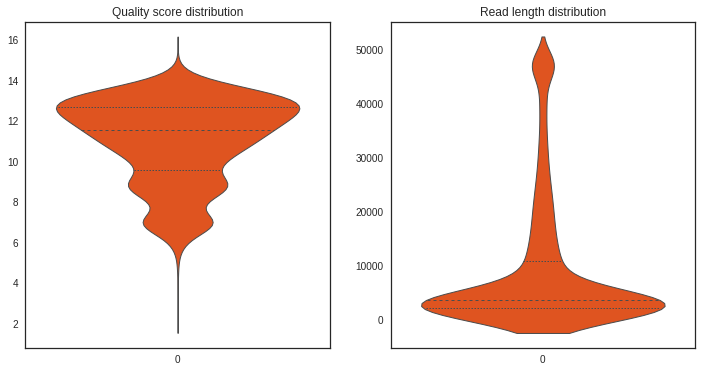

In [13]:
p.overview()

## trim_read_len

In [14]:
help(pycoQC.trim_read_len)

Help on function trim_read_len in module pycoQC:

trim_read_len(self, min_len=None, max_len=None)
    Remove reads longer or shorter than the indicated limits from all downstream analysis
    * min_len
        Minimal length of the reads to retain
    * max_len
        Maximal length of the reads to retain



In [15]:
p.trim_read_len(min_len=50, max_len=40000)

In [16]:
print(p.df.sequence_length_template.min())
print(p.df.sequence_length_template.max())

50
39997


## trim_read_qual

In [17]:
help(pycoQC.trim_read_qual)

Help on function trim_read_qual in module pycoQC:

trim_read_qual(self, min_qual=None, max_qual=None)
    Remove reads under or above indicated limits from all downstream analysis
    * min_len
        Minimal quality of the reads to retain
    * max_len
        Maximal quality of the reads to retain



In [18]:
p.trim_read_qual(min_qual=5, max_qual=15)

In [19]:
print(p.df.mean_qscore_template.min())
print(p.df.mean_qscore_template.max())

5.003
15.0


## channels_activity

In [20]:
help(pycoQC.channels_activity)

Help on function channels_activity in module pycoQC:

channels_activity(self, level='reads', figsize=[24, 12], cmap='OrRd', alpha=1, robust=True, annot=True, fmt='d', cbar=False, **kwargs)
    Plot the activity of channels at read, base or event level. Based on Seaborn heatmap function. The layout does not represent the
    physical layout of the flowcell, and   
    * level
        Aggregate channel output results by "reads", "bases" or "events". [Default "reads"]
    * figsize 
        Size of ploting area [Default [24,12]]
    * cmap
        Matplotlib colormap code to color the space [Default "OrRd"]
    * alpha
        Opacity of the area from 0 to 1 [Default 1]
    * robust
        if True the colormap range is computed with robust quantiles instead of the extreme values [Default True]
    * annot
        If True, write the data value in each cell. [Default True]
    * fmt
        String formatting code to use when adding annotations (see matplotlib documentation) [Default "d"]
 

In [21]:
p = pycoQC("./data/sequencing_summary.txt")

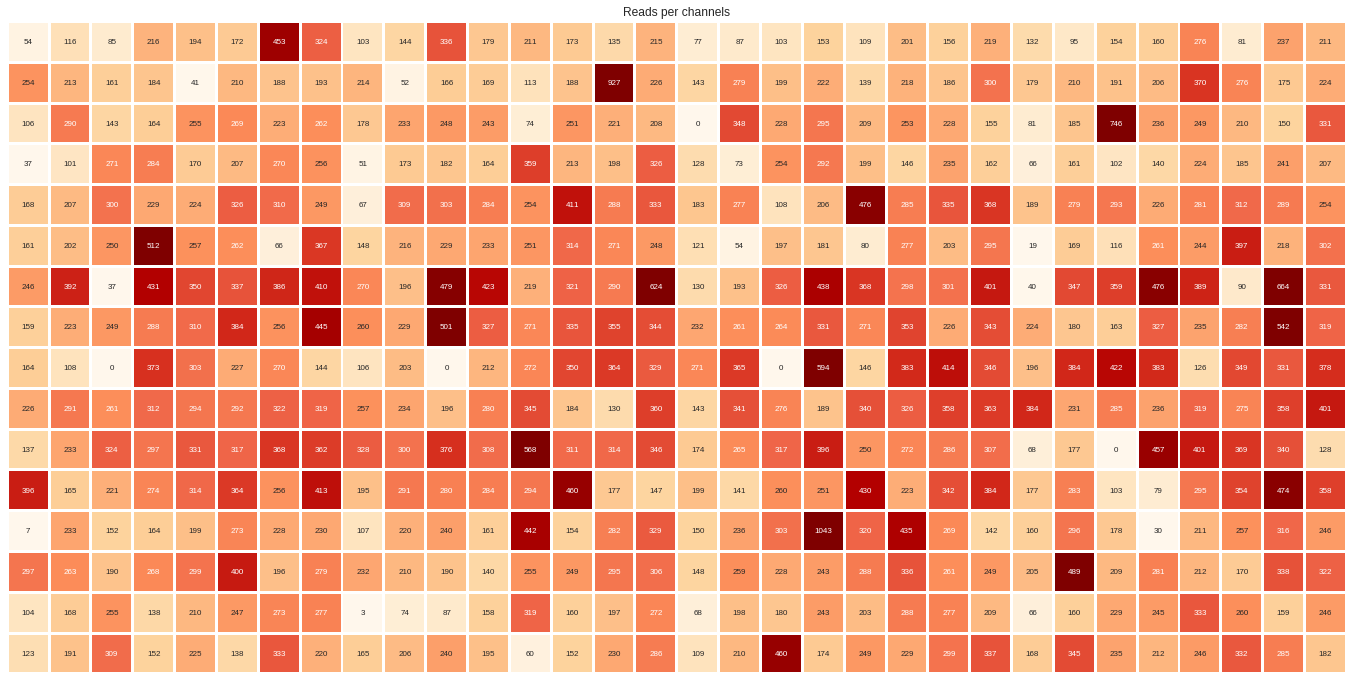

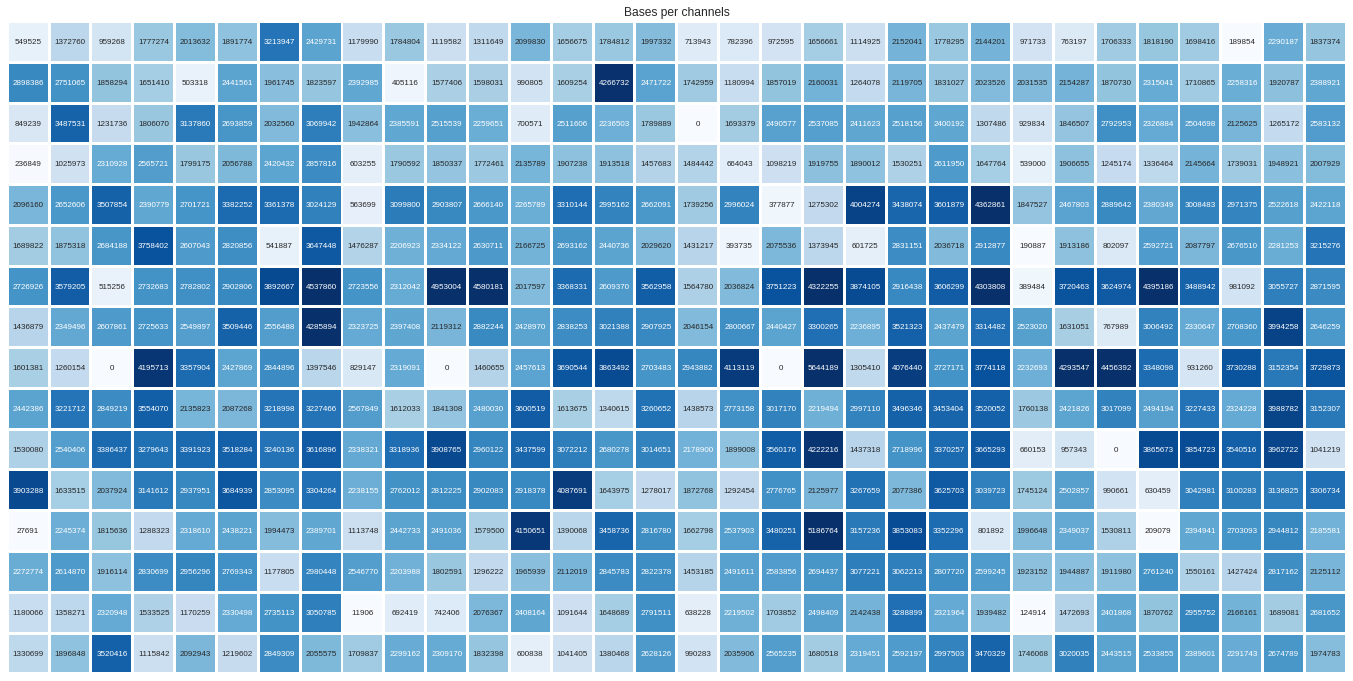

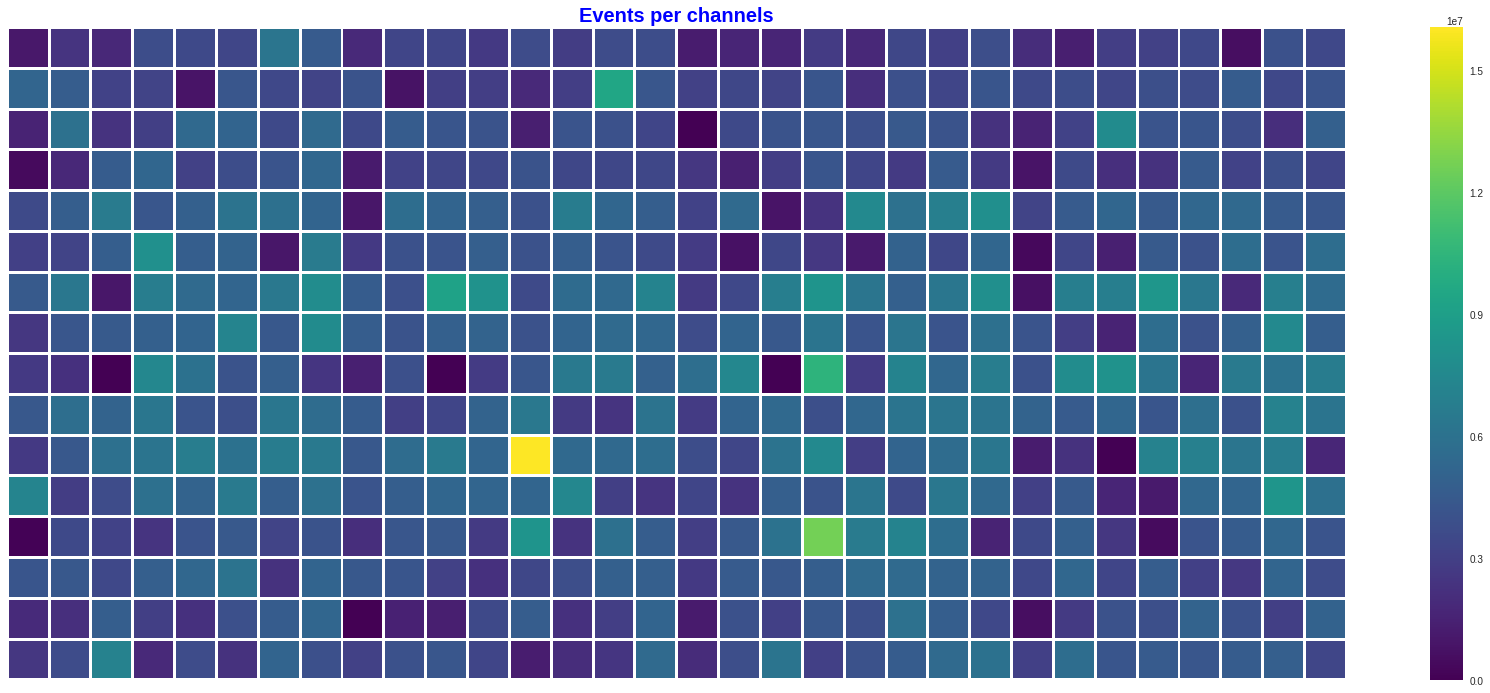

In [22]:
g = p.channels_activity(level='reads')
g = p.channels_activity(level='bases', cmap="Blues")
g = p.channels_activity(level='events', cmap="viridis", cbar=True, annot=False, figsize=[30,12], robust=False)

# Changing properties of the axis title
g.title.set_fontsize(20)
g.title.set_color("blue")
g.title.set_fontweight("bold")

## mean_qual_distribution

In [23]:
help(pycoQC.mean_qual_distribution)

Help on function mean_qual_distribution in module pycoQC:

mean_qual_distribution(self, figsize=[30, 7], hist=True, kde=True, kde_color='black', hist_color='orangered', kde_alpha=0.5, hist_alpha=0.5, win_size=0.1, xmin=None, xmax=None, ymin=None, ymax=None, **kwargs)
    * figsize
        Size of ploting area [Default [30,7]]
    * hist
        If True plot an histogram of distribution [Default True]
    * kde
        If True plot a univariate kernel density estimate [Default True]
    * kde_color / hist_color
        Color map or color codes to use for the 3 plots [Default "black" "orangered"]
    * kde_alpha / hist_alpha
        Opacity of the area from 0 to 1 for the 3 plots [Default 0.5 0.5]
    * win_size
        Size of the bins in quality score ranging from 0 to 40 for the histogram [Default 0.1]
    * xmin, xmax, ymin, ymax
        Lower and upper limits on x/y axis [Default None]
    => Return
        A matplotlib.axes object for further user customisation (http://matplotlib.o

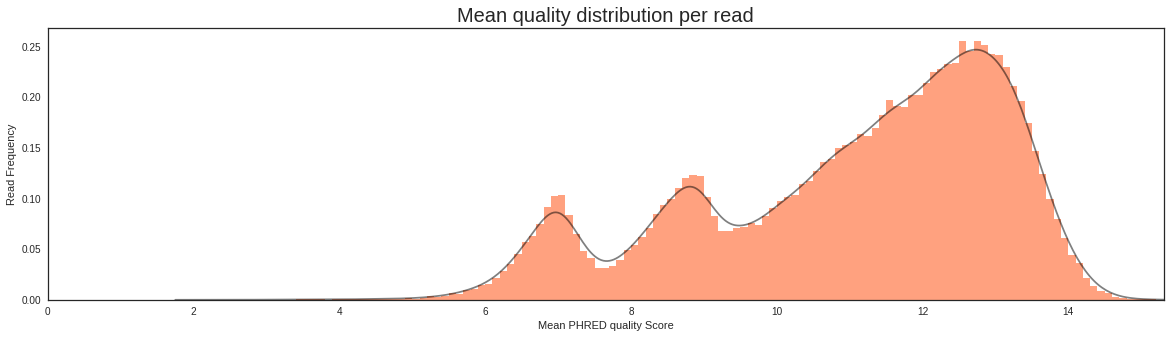

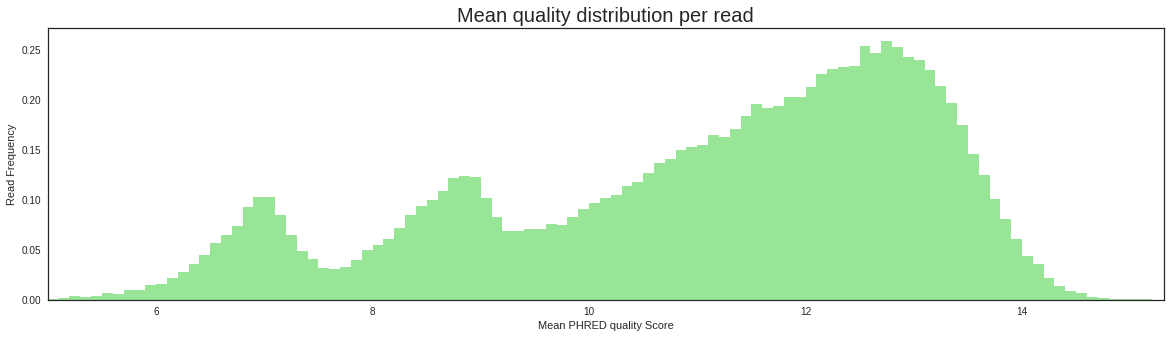

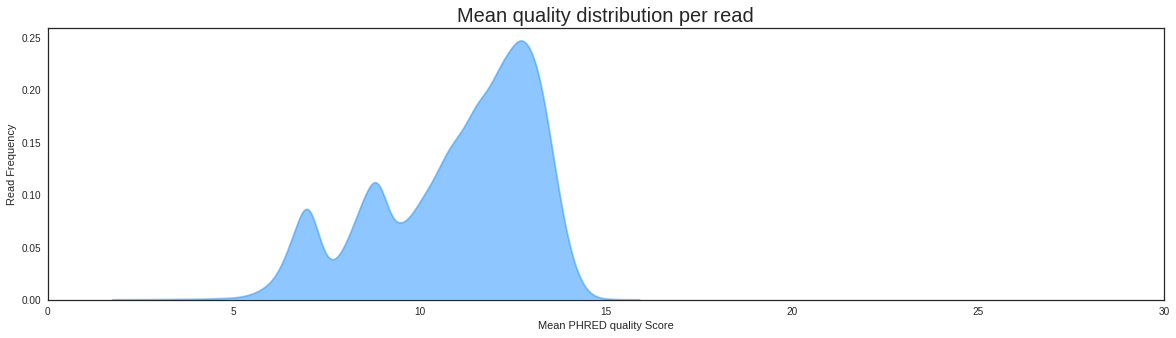

In [24]:
# Default option = histogram + kde
g = p.mean_qual_distribution(figsize=[20, 5])
g.title.set_fontsize(20)

# histogram only
g = p.mean_qual_distribution(figsize=[20, 5], kde=False, hist_color="limegreen", xmin=5)
g.title.set_fontsize(20)

# kde only
g = p.mean_qual_distribution(figsize=[20, 5], hist=False, kde_color="dodgerblue", xmax=30)
g.title.set_fontsize(20)

## output_over_time

In [25]:
help(pycoQC.output_over_time)

Help on function output_over_time in module pycoQC:

output_over_time(self, level='reads', figsize=[30, 7], color='orangered', alpha=0.5, win_size=0.25, cumulative=False, **kwargs)
    Plot the output over the time of the experiment at read, base or event level
    * level
        Aggregate channel output results by "reads", "bases" or "events" [Default "reads"]
    * figsize
        Size of ploting area [Default [30,7]
    * color
        Color of the plot. Valid matplotlib color code [Default "orangered"]
    * alpha
        Opacity of the area from 0 to 1 [Default 0.5]
    * win_size
        Size of the bins in hours [Default 0.25]
    * cumulative
        cumulative histogram [Default False]
    => Return
        A matplotlib.axes object for further user customisation (http://matplotlib.org/api/axes_api.html)



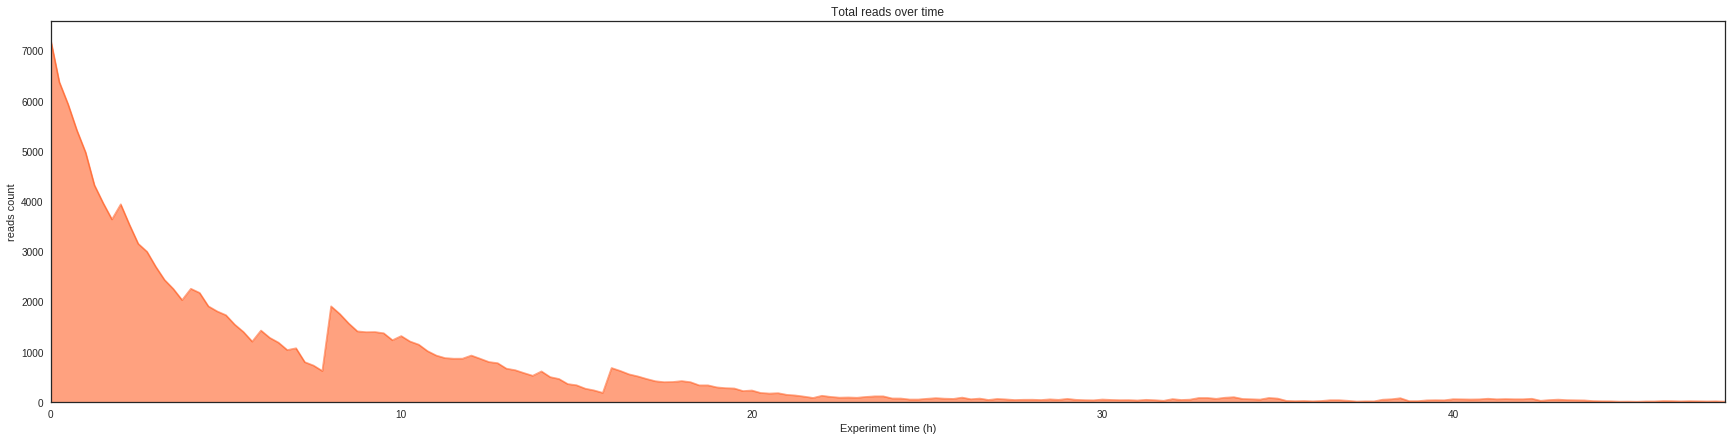

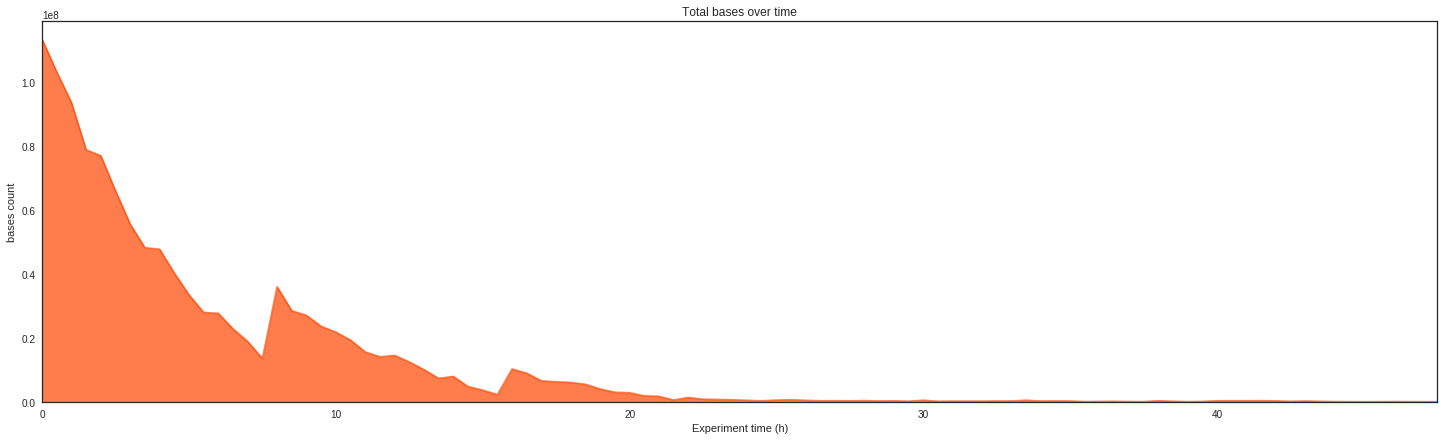

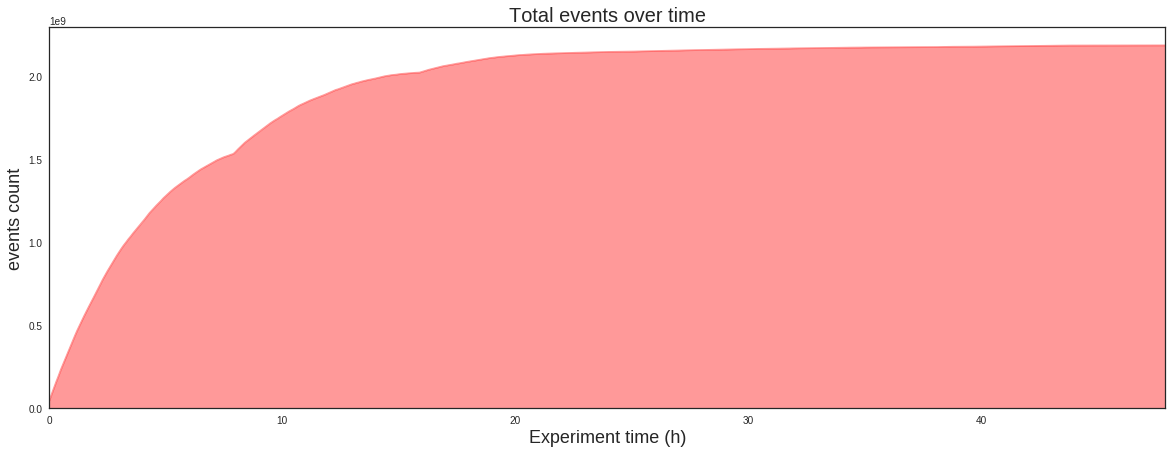

In [26]:
g = p.output_over_time(level='reads')
g = p.output_over_time(level='bases', figsize=[25, 7], color='orangered', alpha=0.7, win_size=0.5, cumulative=False)
g = p.output_over_time(level='events', figsize=[20, 7], color='red', alpha=0.4, win_size=0.1, cumulative=True)

# Changing size of the axis title and labels
g.title.set_fontsize(20)
g.xaxis.label.set_fontsize(18)
g.yaxis.label.set_fontsize(18)

## quality_over_time

In [27]:
help(pycoQC.quality_over_time)

Help on function quality_over_time in module pycoQC:

quality_over_time(self, figsize=[30, 7], color='orangered', alpha=0.25, win_size=0.25, **kwargs)
    Plot the evolution of the mean read quality over the time of the experiment at read, base or event level
    * figsize
        Size of ploting area [Default [30,7]
    * color
        Color of the plot. Valid matplotlib color code [Default "orangered"]
    * alpha
        Opacity of the area from 0 to 1 [Default 0.25]
    * win_size
        Size of the bins in hours [Default 0.25]
    => Return
        A matplotlib.axes object for further user customisation (http://matplotlib.org/api/axes_api.html)



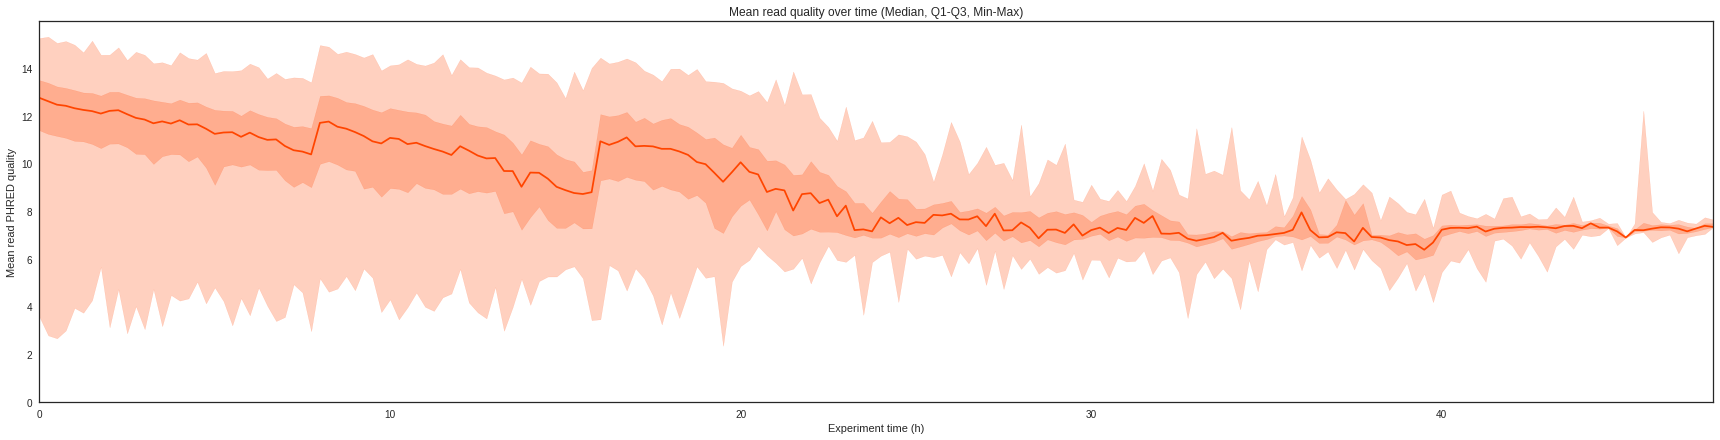

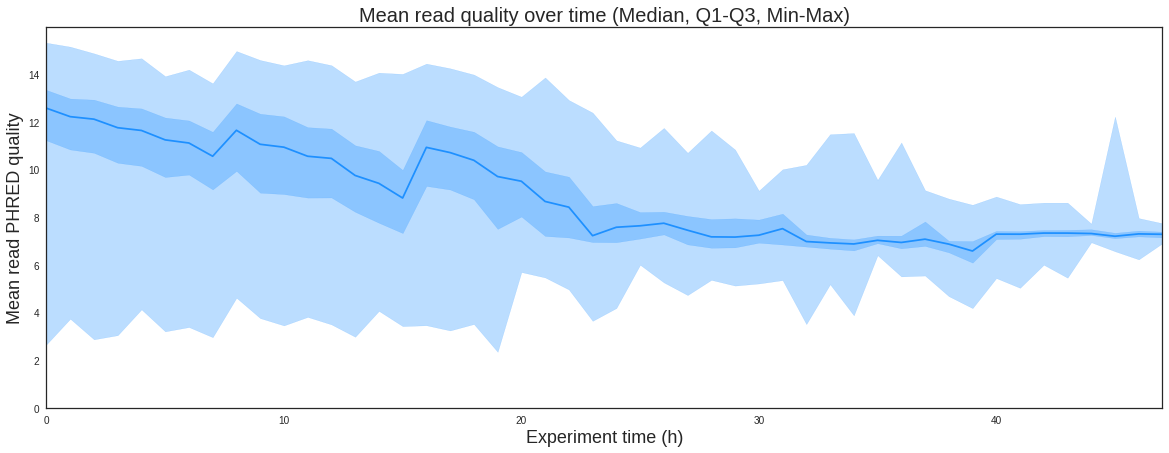

In [28]:
g = p.quality_over_time()
g = p.quality_over_time(figsize=[20,7], color='dodgerblue', alpha=0.3, win_size=1)

# Changing size of the axis title and labels
g.title.set_fontsize(20)
g.xaxis.label.set_fontsize(18)
g.yaxis.label.set_fontsize(18)

## reads_len_distribution

In [29]:
help(pycoQC.reads_len_distribution)

Help on function reads_len_distribution in module pycoQC:

reads_len_distribution(self, figsize=[30, 7], hist=True, kde=True, kde_color='black', hist_color='orangered', kde_alpha=0.5, hist_alpha=0.5, win_size=250, xmin=None, xmax=None, ymin=None, ymax=None, **kwargs)
    Plot the distribution of read length in base pairs
    * figsize
        Size of ploting area [Default [30,7]]
    * hist
        If True plot an histogram of distribution [Default True]
    * kde
        If True plot a univariate kernel density estimate [Default True]
    * kde_color / hist_color
        Color map or color codes to use for the 3 plots [Default "black" "orangered"]
    * kde_alpha / hist_alpha
        Opacity of the area from 0 to 1 for the 3 plots [Default 0.5 0.5]
    * win_size
        Size of the bins in base pairs for the histogram [Default 250]
    * xmin, xmax, ymin, ymax
        Lower and upper limits on x/y axis [Default None]
    => Return
        A matplotlib.axes object for further user cus

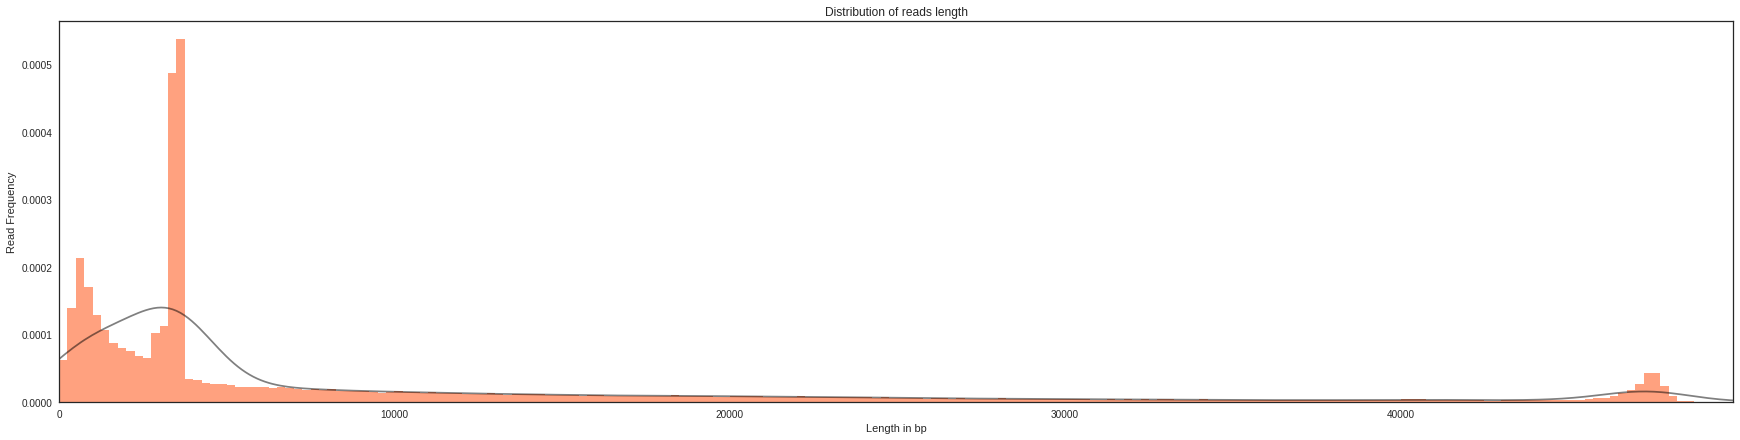

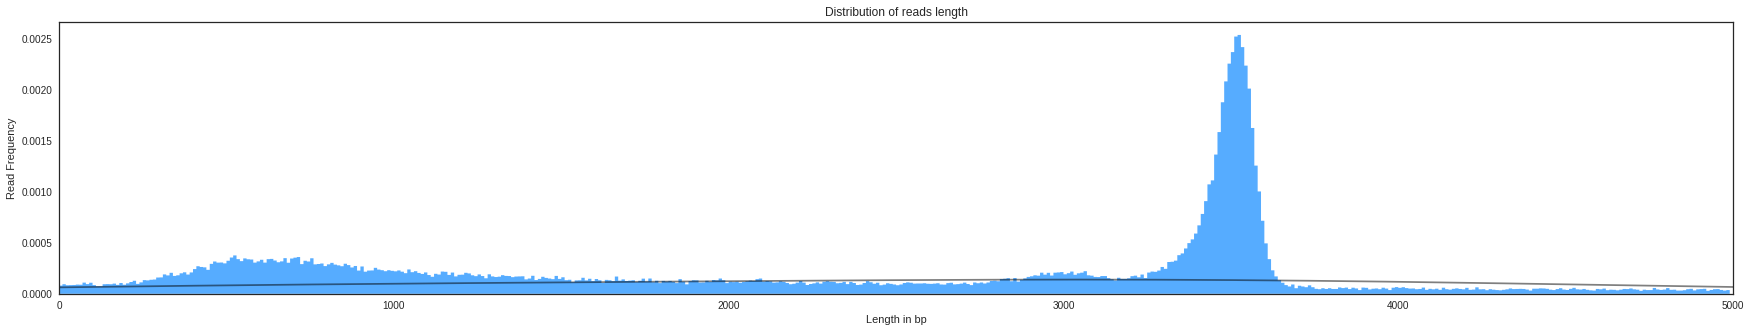

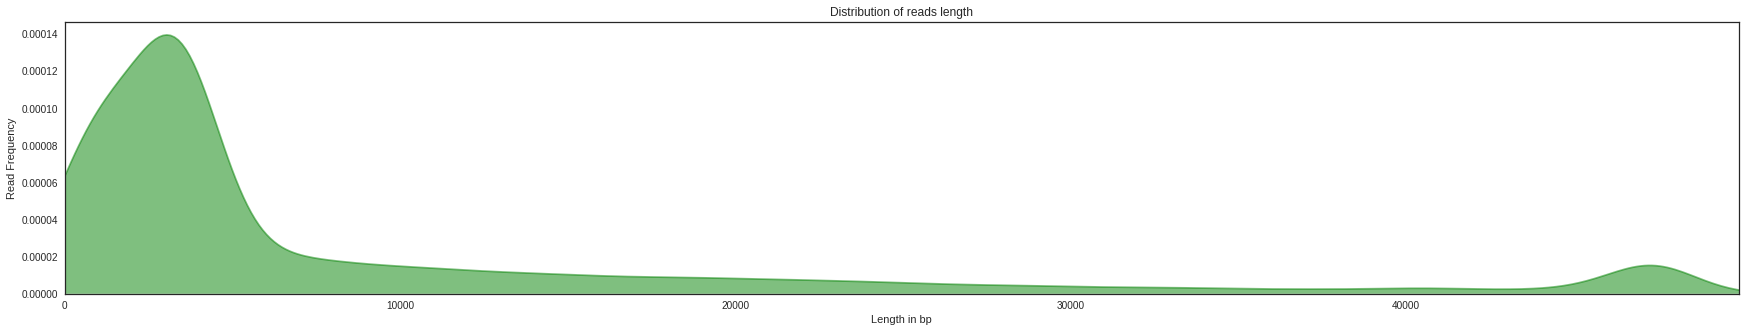

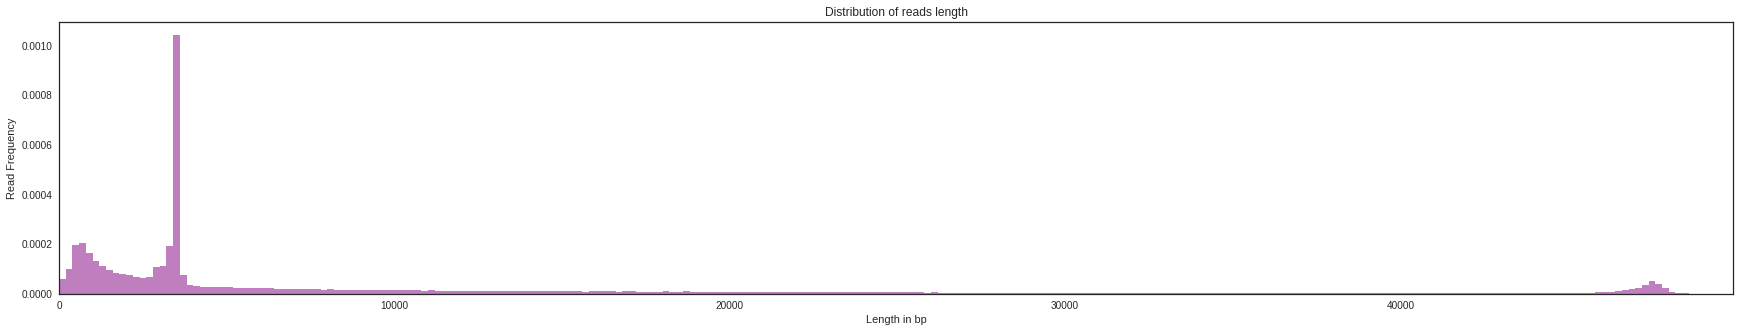

In [30]:
g = p.reads_len_distribution()
g = p.reads_len_distribution(figsize=[30, 5], hist=True, kde=True, hist_color='dodgerblue', hist_alpha=0.75, xmax=5000, win_size=10)
g = p.reads_len_distribution(figsize=[30, 5], hist=False, kde=True, kde_color='green', kde_alpha=0.5)
g = p.reads_len_distribution(figsize=[30, 5], hist=True, kde=False, hist_color='purple', win_size=200)

## reads_len_quality

In [31]:
help(pycoQC.reads_len_quality)

Help on function reads_len_quality in module pycoQC:

reads_len_quality(self, figsize=12, kde=True, scatter=True, margin_plot=True, kde_cmap='copper', scatter_color='orangered', margin_plot_color='orangered', kde_alpha=1, scatter_alpha=0.01, margin_plot_alpha=0.5, sample=None, kde_levels=10, kde_shade=False, xmin=None, xmax=None, ymin=None, ymax=None, **kwargs)
    Draw a bivariate plot of read length vs mean read quality with marginal univariate plots.
    The bivariate kde can takes time to calculate depending on the number of data points 
    * figsize
        Size of square ploting area [Default 12]
    * kde
        If True plot a bivariate kernel density estimate [Default True]
    * scatter
        If True plot a scatter plot  [Default true]
    * margin_plot
        If True plot marginal univariate distributions [Default True]
    * kde_cmap / scatter_color / margin_plot_color
        Color map or color codes to use for the 3 plots [Default "copper", "orangered", "orangered"]
 

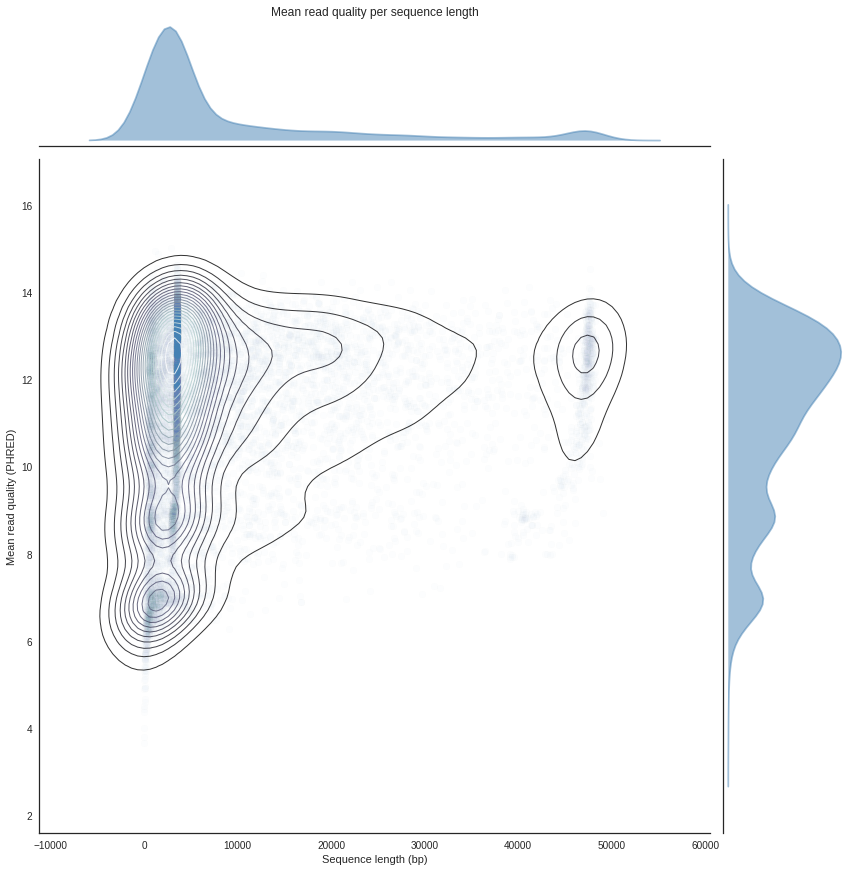

In [32]:
p.reads_len_quality(kde=True, kde_cmap="bone", kde_alpha=0.8, kde_levels=25, scatter=True, scatter_color='steelblue', margin_plot=True, margin_plot_color='steelblue', sample = 10000)

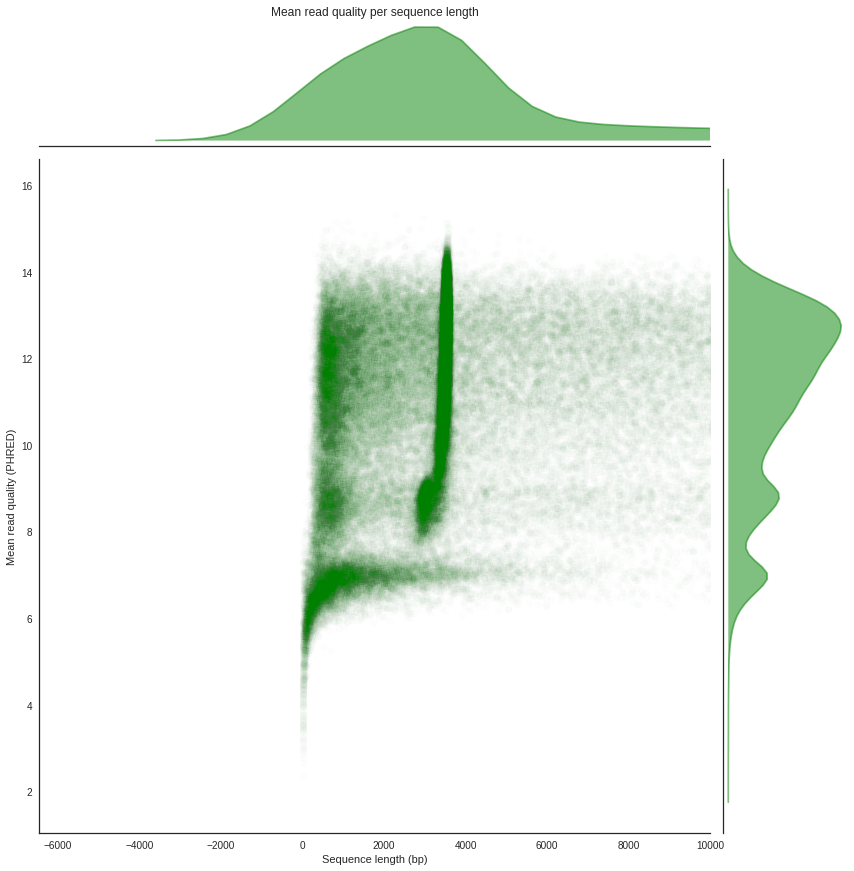

In [33]:
p.reads_len_quality(scatter=True, kde=False, scatter_alpha=0.01, scatter_color="green", margin_plot=True, margin_plot_color='green', margin_plot_alpha=0.5, xmax=10000)

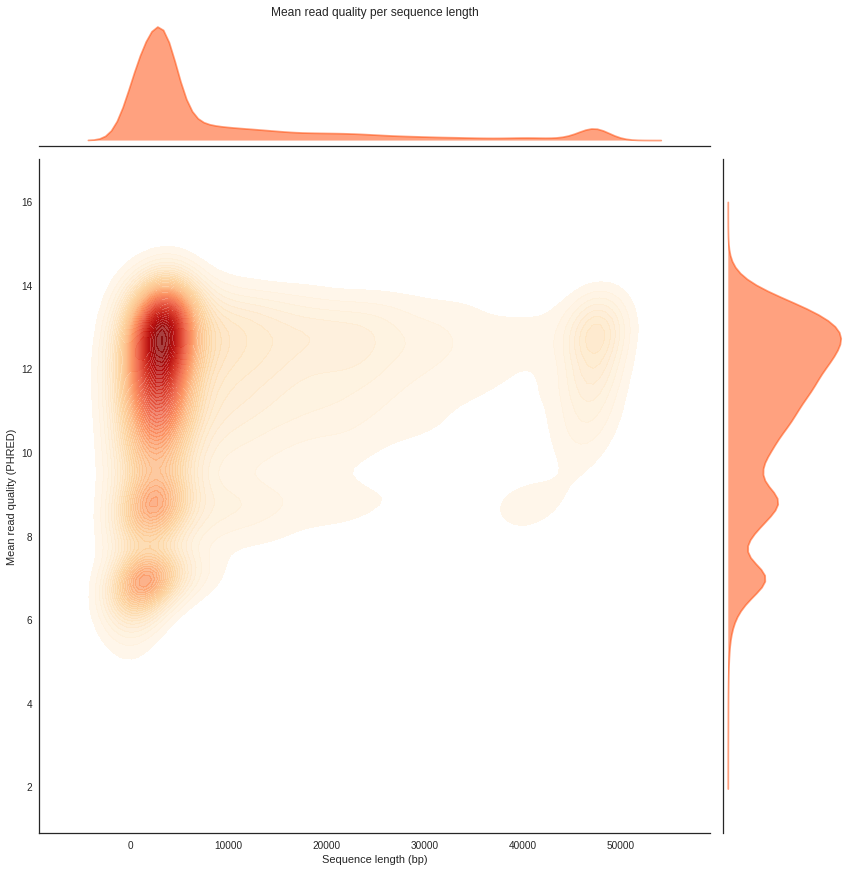

In [34]:
g = p.reads_len_quality(kde=True, kde_cmap='OrRd', kde_alpha=0.75, kde_levels=50, kde_shade=True, scatter=False, sample = 50000)